## Analyzing survey results


In [ ]:
import os
import pandas as pd
import numpy as np
import random
import scipy
import matplotlib.pyplot as plt
from scipy.stats import levene
from scipy.stats import f_oneway

#os.chdir(os.getcwd())
#print(os.getcwd())

In [ ]:

def append_lists(ordering_indication: int, survey_x: pd.DataFrame, listings_col: list, llama_adapter_col: list, llama_adater_all_col: list, llama_no_peft_col: list, true_names_col: list):

  for idx in range(survey_x.shape[0]):

    df_iloc = pd.DataFrame(survey_x.iloc[idx,:])
    df_iloc.columns = ["result"]
    list_listings = list(df_iloc.index[df_iloc["result"] != -77])
    list_chosen = list(df_iloc["result"][df_iloc["result"] != -77])

    ## appending
    listings_col.extend(list_listings)

    if ordering_indication == 1:
      for g in range(2):
        if list_chosen[g] == 1:
          true_names_col.append(1)
          llama_adapter_col.append(0)
          llama_adater_all_col.append(0)
          llama_no_peft_col.append(0)
        elif list_chosen[g] == 2:
          true_names_col.append(0)
          llama_adapter_col.append(1)
          llama_adater_all_col.append(0)
          llama_no_peft_col.append(0)
        elif list_chosen[g] == 3:
          true_names_col.append(0)
          llama_adapter_col.append(0)
          llama_adater_all_col.append(0)
          llama_no_peft_col.append(1)
        elif list_chosen[g] == 4:
          true_names_col.append(0)
          llama_adapter_col.append(0)
          llama_adater_all_col.append(1)
          llama_no_peft_col.append(0)
        else:
          true_names_col.append(0)
          llama_adapter_col.append(0)
          llama_adater_all_col.append(0)
          llama_no_peft_col.append(0)

    elif ordering_indication == 2:
      for g in range(2):
        if list_chosen[g] == 1:
          true_names_col.append(0)
          llama_adapter_col.append(1)
          llama_adater_all_col.append(0)
          llama_no_peft_col.append(0)
        elif list_chosen[g] == 2:
          true_names_col.append(0)
          llama_adapter_col.append(0)
          llama_adater_all_col.append(1)
          llama_no_peft_col.append(0)
        elif list_chosen[g] == 3:
          true_names_col.append(1)
          llama_adapter_col.append(0)
          llama_adater_all_col.append(0)
          llama_no_peft_col.append(0)
        elif list_chosen[g] == 4:
          true_names_col.append(0)
          llama_adapter_col.append(0)
          llama_adater_all_col.append(0)
          llama_no_peft_col.append(1)
        else:
          true_names_col.append(0)
          llama_adapter_col.append(0)
          llama_adater_all_col.append(0)
          llama_no_peft_col.append(0)

    else:
      for g in range(2):
        if list_chosen[g] == 1:
          true_names_col.append(0)
          llama_adapter_col.append(0)
          llama_adater_all_col.append(0)
          llama_no_peft_col.append(1)
        elif list_chosen[g] == 2:
          true_names_col.append(0)
          llama_adapter_col.append(0)
          llama_adater_all_col.append(1)
          llama_no_peft_col.append(0)
        elif list_chosen[g] == 3:
          true_names_col.append(0)
          llama_adapter_col.append(1)
          llama_adater_all_col.append(0)
          llama_no_peft_col.append(0)
        elif list_chosen[g] == 4:
          true_names_col.append(1)
          llama_adapter_col.append(0)
          llama_adater_all_col.append(0)
          llama_no_peft_col.append(0)
        else:
          true_names_col.append(0)
          llama_adapter_col.append(0)
          llama_adater_all_col.append(0)
          llama_no_peft_col.append(0)


  return listings_col, llama_adapter_col, llama_adater_all_col, llama_no_peft_col, true_names_col



def permutation_test(list_1, list_2, num_permutations):

  counter = 0

  real_diff = np.mean(list_1 - list_2)

  for i in range(num_permutations):

    added_list = list(list_1) +(list(list_2))

    # shufflig in place: https://stackoverflow.com/questions/47516428/cant-get-random-shuffle-to-work-python-random-shuffle
    random.shuffle(added_list)

    cut_off = 0.5*np.floor(len(added_list))
    first_part = added_list[:int(cut_off)]
    second_part = added_list[int(cut_off):]

    if np.abs(np.mean(first_part)-np.mean(second_part)) > real_diff:
      counter += 1

    #print(i)

  emp_p_val =  counter / num_permutations

  return emp_p_val



def get_rel_shares(listing_id: str):

  """ Function to retrieve relative shares per thumbnail
  for the collapsed DF. """

  sub_df = df_survey_results[df_survey_results.listing == listing_id]
  len_ = sub_df.shape[0]


  rel_llama_adapter = sum(sub_df.llama_adapter)/len_
  rel_llama_adater_all = sum(sub_df.llama_adater_all)/len_
  rel_llama_no_peft = sum(sub_df.llama_no_peft)/len_
  rel_true_names = sum(sub_df.true_names)/len_

  return rel_llama_adapter, rel_llama_adater_all, rel_llama_no_peft, rel_true_names


In [ ]:
# connecting to drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


### Loading in and manipulating data

In [ ]:

data_survey = pd.read_csv("/content/gdrive/My Drive/Thesis/survey_data/data_project_991419_2023_08_23.csv", sep = ";")

In [ ]:
overall_size = data_survey.shape[0]
data_survey ##.head()


,lfdn,external_lfdn,tester,dispcode,lastpage,quality,duration,v_1,v_2,v_54,...,date_of_last_access,date_of_first_mail,rts6729699,rts6729700,rts6729701,rts6729703,rts6729705,rts6729707,rts6729709,rts6731066
0,6,0,0,31,6729710,-77,107,0,0,-99,...,2023-08-02 15:22:22,0000-00-00 00:00:00,74,77,80,85,90,94,96,107
1,8,0,0,31,6729710,-77,167,1,2,judith.klaiber97@gmail.com,...,2023-08-03 11:27:35,0000-00-00 00:00:00,10,19,33,77,109,141,157,167
2,10,0,0,31,6729710,-77,265,1,3,radici.jasmina@gmail.com,...,2023-08-03 11:32:49,0000-00-00 00:00:00,3,19,21,100,178,216,244,265
3,11,0,0,31,6729710,-77,312,1,1,jennie.nguyen@gmx.de,...,2023-08-03 11:33:40,0000-00-00 00:00:00,4,11,41,128,214,276,299,312
4,12,0,0,31,6729710,-77,382,1,2,e.klink@student.uni-tuebingen.de,...,2023-08-03 11:36:30,0000-00-00 00:00:00,5,18,39,122,263,332,364,382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,575,0,0,31,6729710,-77,164,1,1,gizemkadi@gmx.de,...,2023-08-22 00:51:41,0000-00-00 00:00:00,8,15,37,81,113,141,151,164
493,576,0,0,31,6729710,-77,347,1,1,-99,...,2023-08-22 07:12:34,0000-00-00 00:00:00,6,16,18,111,172,331,341,347
494,577,0,0,31,6729710,-77,1436,1,1,estryae@gmail.com,...,2023-08-22 07:56:33,0000-00-00 00:00:00,13,21,55,1103,1229,1377,1426,1436
495,578,0,0,31,6729710,-77,211,2,2,-99,...,2023-08-22 08:26:39,0000-00-00 00:00:00,12,23,48,79,127,193,205,211


How long did participants take?

In [ ]:
dur_minutes = [i/60 for i in data_survey.duration]

print(f"The average time for responding was {str(np.floor(np.mean(dur_minutes)))} minutes and {(np.mean(dur_minutes) -  np.floor(np.mean(dur_minutes))  ) * 60 } seconds.")

The average time for responding was 6.0 minutes and 57.15291750503019 seconds.


In [ ]:
# less than 2.5 minutes

print(len([i for i in dur_minutes if i < 2.5])/len(dur_minutes))

# less than 3 minutes

print(len([i for i in dur_minutes if i < 3])/len(dur_minutes))


0.09054325955734406
0.1448692152917505


In [ ]:
# more than 20 min

print(len([i for i in dur_minutes if i > 20])/len(dur_minutes))

0.03621730382293763


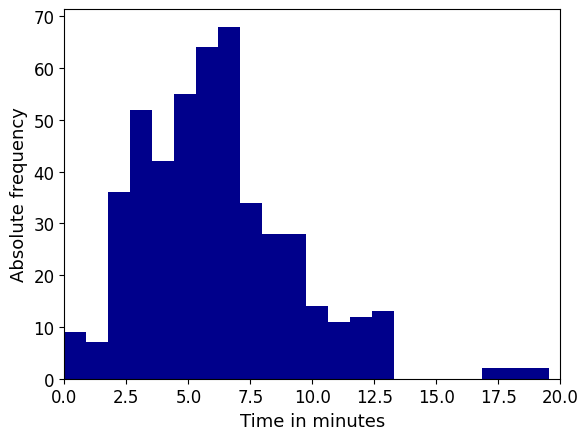

In [ ]:
import matplotlib.pyplot as plt

name_to_save = "distribution_times_survey"

plt.hist(dur_minutes, bins = 60, color = "darkblue")
plt.xlim(0, 20)
plt.xlabel("Time in minutes", fontsize=13)
plt.ylabel("Absolute frequency", fontsize=13)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig(f'/content/gdrive/My Drive/Thesis/Plots/{name_to_save}.png')
plt.show()

filtering out participants whi took less than 2.5 minutes and more than 20 minutes.

In [ ]:
overall_size = data_survey.shape[0]

min_time = 2.5*60
max_time = 20*60
data_survey = data_survey[(data_survey.duration >= min_time) & (data_survey.duration <= max_time)]



In [ ]:
lost = (overall_size - data_survey.shape[0])/overall_size
print(f"{str(lost*100)} percent of responses needed to be dropped because of unrealisitc time taken for responding.")


12.676056338028168 percent of responses needed to be dropped because of unrealisitc time taken for responding.


### Removing participants based of filtering questions


#### Filtering out participants claiming they can't speak english very well or/and do not know AirBnB


In [ ]:
data_survey.v_1.value_counts()

1    415
2     17
0      2
Name: v_1, dtype: int64

In [ ]:
data_survey.v_2.value_counts()


1    240
2    131
3     60
0      3
Name: v_2, dtype: int64

60 claim they do not know AirBnB (amounts to 13.8) percent, 3 did not answer.
However, not knowing AirBnB should not be reason to not include the correpsnding submissions as participants can still be expectd to state their preferred title as everything is rather self-explanatory.

In [ ]:
drop_out_bad_english = True
drop_out_not_knowing_airbnb = False

shape_before = data_survey.shape[0]

if drop_out_bad_english == True:
  if drop_out_not_knowing_airbnb == True:
    data_survey = data_survey[(data_survey.v_1 == 1) & (data_survey.v_2.isin([1,2]))]
  else:
    data_survey = data_survey[(data_survey.v_1 == 1)]
else:
  if drop_out_not_knowing_airbnb == True:
        data_survey = data_survey[data_survey.v_2.isin(1,2)]
  else:
    pass

In [ ]:
print(f"This filtering operation lead to {str( ((shape_before-data_survey.shape[0])/shape_before)*100)} percent being dropped.")

This filtering operation lead to 4.377880184331797 percent being dropped.


#### Filtering out those who chose an spurious answer for the "bad example"

In [ ]:
data_survey.v_53_1.value_counts()

1    225
4    182
2      6
3      1
0      1
Name: v_53_1, dtype: int64

In [ ]:
shape_before = data_survey.shape[0]

data_survey = data_survey[data_survey.v_53_1.isin([1,4])]
print(f"This filtering operation lead to {str( ((shape_before-data_survey.shape[0])/shape_before)*100)} percent being dropped.")

This filtering operation lead to 1.9277108433734942 percent being dropped.


In [ ]:
print(f" {str(data_survey.shape[0])} data points remain for further analysis.")

 407 data points remain for further analysis.


In [ ]:
data_survey.index = list(range(data_survey.shape[0]))

### Statistical Analysis


Per thumbnail shown (i.e. if a thumbnails was showm multiple times -> multiple entries), retrieving the favourite title. A DF of a specific build-up is required to call statistical functions (see below).

This DF willl thus contain 6 * number of remaining data points rows.

In [ ]:
listings_col = []
llama_adapter_col = []
llama_adater_all_col = []
llama_no_peft_col = []
true_names_col = []


In [ ]:
## first two_questions
a = list(data_survey.columns)
list_1 = [i for i in a if i.startswith('v_50_')]
survey_1 = data_survey[list_1]


In [ ]:
ordering_indication  = 1
listings_col, llama_adapter_col, llama_adater_all_col, llama_no_peft_col, true_names_col = append_lists(ordering_indication, survey_1, listings_col, llama_adapter_col, llama_adater_all_col, llama_no_peft_col, true_names_col)

In [ ]:
## second two_questions
list_2 = [i for i in a if i.startswith('v_51_')]
survey_2 = data_survey[list_2]


In [ ]:
ordering_indication  = 2
listings_col, llama_adapter_col, llama_adater_all_col, llama_no_peft_col, true_names_col = append_lists(ordering_indication, survey_2, listings_col, llama_adapter_col, llama_adater_all_col, llama_no_peft_col, true_names_col)

In [ ]:
## third two_questions
list_3 = [i for i in a if i.startswith('v_52_')]
survey_3 = data_survey[list_3]


In [ ]:
ordering_indication  = 3
listings_col, llama_adapter_col, llama_adater_all_col, llama_no_peft_col, true_names_col = append_lists(ordering_indication, survey_3, listings_col, llama_adapter_col, llama_adater_all_col, llama_no_peft_col, true_names_col)

In [ ]:
print(f"In {str(len([i for i in llama_adapter_col if i == 1])/len(llama_adapter_col) * 100)} percent of all cases, the LLama PEFT (trained on 'more successful' listings) generated title was the preferred one.")
print(f"In {str(len([i for i in llama_adater_all_col if i == 1])/len(llama_adater_all_col) * 100)} percent of all cases, the LLama PEFT (trained on all listings) generated title was the preferred one.")
print(f"In {str(len([i for i in llama_no_peft_col if i == 1])/len(llama_no_peft_col) * 100)} percent of all cases, the LLama without PEFT generated title was the preferred one.")
print(f"In {str(len([i for i in true_names_col if i == 1])/len(true_names_col) * 100)} percent of all cases, the true title was the preferred one.")



In 40.99099099099099 percent of all cases, the LLama PEFT (trained on 'more successful' listings) generated title was the preferred one.
In 19.328419328419326 percent of all cases, the LLama PEFT (trained on all listings) generated title was the preferred one.
In 20.024570024570025 percent of all cases, the LLama without PEFT generated title was the preferred one.
In 19.45126945126945 percent of all cases, the true title was the preferred one.


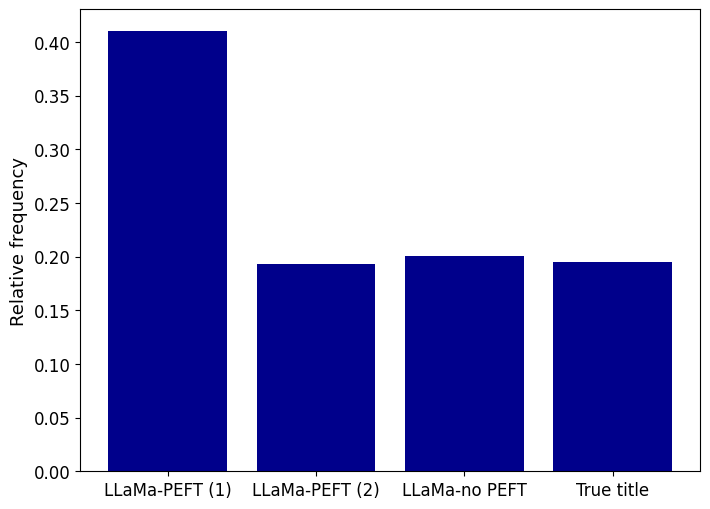

In [ ]:
dict_freq = {
    "LLaMa-PEFT (1)": len([i for i in llama_adapter_col if i == 1])/len(llama_adapter_col),
    "LLaMa-PEFT (2)": len([i for i in llama_adater_all_col if i == 1])/len(llama_adater_all_col),
    "LLaMa-no PEFT": len([i for i in llama_no_peft_col if i == 1])/len(llama_no_peft_col),
    "True title": len([i for i in true_names_col if i == 1])/len(true_names_col)
  }

keys = dict_freq.keys()
vals = dict_freq.values()

name_to_save = "survey_results_bar"

plt.figure(figsize=(8, 6))
plt.bar(keys, vals, color = "darkblue")
plt.ylabel("Relative frequency", fontsize=13)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig(f'/content/gdrive/My Drive/Thesis/Plots/{name_to_save}.png')

plt.show()


In [ ]:
## setting up df

df_survey_results = pd.DataFrame({"listing": listings_col, "llama_adapter": llama_adapter_col, "llama_adater_all": llama_adater_all_col, "llama_no_peft": llama_no_peft_col, "true_names": true_names_col })
df_survey_results.to_csv("/content/gdrive/My Drive/Thesis/survey_data/df_survey_results.csv", index = False)


In [ ]:
# asserting that the shape of this DF equals the number of final datapoints times 6!

assert df_survey_results.shape[0] == 6 * data_survey.shape[0]


In [ ]:
# average number of responses per thumbnail

print(f"The average number of responses for each thumbnail is {df_survey_results.shape[0] / 500}.")

The average number of responses for each thumbnail is 4.884.


## Statistical testing

### ANOVA

-> univariate anova - only differing by one dimension

-> null hypothesis -> equal means

-> comparing means and between group vs within group variation

-> both variances are already adjusted for k-1

F = between group / within group

-> here n-4 (or n-3)  degrees of freedom.


Thoughts on pre-requisits for ANOVA

1. Assumption No. 1 - IID Draws in sample: SATISFIED as Samples are iid, different people have answered the survey. Also no temporal correlation to be expected!
2. Assumption No. 2 - per factor group (here type of model that generated the title), the outoe variables is normally distributed: CANNOT BE SATISFIED as output data is binary  --> reduces robustnes of Anova results
3. Equal variances of output varaible per factor group: I guess iit will be vialoated as higher mean for Llama-PEFT -> greater deviates sqaured -> greater variance in this case -> can reduce robustness as well (perhaps not using these titles)




In [ ]:
## normality of outcomes (by feature) cannot be given as output is binary


In [ ]:
### 3 -  equal variances

print(np.var(df_survey_results.llama_adapter))
print(np.var(df_survey_results.llama_adater_all))
print(np.var(df_survey_results.llama_no_peft))
print(np.var(df_survey_results.true_names))


0.2418837756675594
0.15592541391067188
0.16014735977880942
0.1566775061861057


In [ ]:
## Using Levene's test to test this

stat_all, p_all = levene(df_survey_results.llama_adapter, df_survey_results.llama_adater_all, df_survey_results.llama_no_peft, df_survey_results.true_names)
print(stat_all, p_all)

print("------")

stat_alt, p_alt = levene(df_survey_results.llama_adater_all, df_survey_results.llama_no_peft, df_survey_results.true_names)
print(stat_alt, p_alt)


156.4003006209919 5.188180776617384e-99
------
0.21386593699874634 0.8074616709287924


Hence taking ANOVA outcomes with a grain of salt.
Also comparing titles without the Llama-PEFT (tuned on successful listings) as this is a more interesting case.
If including all 4 types of titles, H0 will be rejected with p close t0 0 anyway :D

In [ ]:
# ANOVA, which will have a pval of ca. 0 :D
f_oneway(df_survey_results.llama_adapter, df_survey_results.llama_adater_all, df_survey_results.llama_no_peft, df_survey_results.true_names)

F_onewayResult(statistic=156.40030062099186, pvalue=5.188180776617384e-99)

what a surprise :o

In [ ]:
# ANOVA without the llama_adapter
f_oneway(df_survey_results.llama_adater_all, df_survey_results.llama_no_peft, df_survey_results.true_names)


F_onewayResult(statistic=0.2138659369987464, pvalue=0.8074616709287924)

This is a more interesting result!

### (Pairwise) Permutation tests

Using such non-parametric tests to avoid issues arising from non-normality
of outcome feature.
Downside: Only two-way comaparisons are possible.

In [ ]:
# vs llama model tuned on all listings

permutation_test(df_survey_results.llama_adapter, df_survey_results.llama_adater_all, 1000)


0.0

In [ ]:
# vs llama model without peft

permutation_test(df_survey_results.llama_adapter, df_survey_results.llama_no_peft, 1000)

0.0

In [ ]:
# vs true titles

permutation_test(df_survey_results.llama_adapter, df_survey_results.true_names, 1000)

0.0

#### Further comparisons vs true names

In [ ]:
# true vs no peft
print(permutation_test(df_survey_results.llama_no_peft, df_survey_results.true_names, 1000))


0.576


In [ ]:
# true vs llama tuned on all
print(permutation_test(df_survey_results.llama_adater_all, df_survey_results.true_names, 1000))


1.0


## Collapsing the DF to obtain relative frequencies of each title being chosen per thumbnail

As ist likely needed for further model-based evaluation of survey results

In [ ]:
# creaging new DF
listings =  np.unique(df_survey_results.listing)

df_collapsed_results = pd.DataFrame({"listing":listings, 	"llama_adapter": np.zeros(len(listings)), 	"llama_adater_all" : np.zeros(len(listings)),	"llama_no_peft": np.zeros(len(listings)), 	"true_names": np.zeros(len(listings))})



In [ ]:
df_collapsed_results

,listing,llama_adapter,llama_adater_all,llama_no_peft,true_names
0,v_50_1,0.0,0.0,0.0,0.0
1,v_50_10,0.0,0.0,0.0,0.0
2,v_50_100,0.0,0.0,0.0,0.0
3,v_50_101,0.0,0.0,0.0,0.0
4,v_50_102,0.0,0.0,0.0,0.0
...,...,...,...,...,...
481,v_52_428,0.0,0.0,0.0,0.0
482,v_52_429,0.0,0.0,0.0,0.0
483,v_52_430,0.0,0.0,0.0,0.0
484,v_52_431,0.0,0.0,0.0,0.0


In [ ]:
# filing in relative shares

rel_shares = df_collapsed_results.listing.apply(lambda x: get_rel_shares(x))

for i in range(rel_shares.shape[0]):
  df_collapsed_results["llama_adapter"][i] = rel_shares[i][0]
  df_collapsed_results["llama_adater_all"][i] = rel_shares[i][1]
  df_collapsed_results["llama_no_peft"][i] = rel_shares[i][2]
  df_collapsed_results["true_names"][i] = rel_shares[i][3]


In [ ]:
# saving to drive

df_collapsed_results.to_csv("/content/gdrive/My Drive/Thesis/survey_data/df_survey_collapsed_results.csv", index = False)

### Figuring out winners of the prize money

Rndomly smapling 5 participants who fininshed in a reasonable time
and passed the "test thumbnail".

In [ ]:
data_survey = pd.read_csv("/content/gdrive/My Drive/Thesis/survey_data/data_project_991419_2023_08_23.csv", sep = ";")

# reasonable time
min_time = 2.5*60
max_time = 20*60
data_survey = data_survey[(data_survey.duration >= min_time) & (data_survey.duration <= max_time)]

# passing tst thubnail
data_survey = data_survey[data_survey.v_53_1.isin([1,4])]

# those who provided a mail

data_survey = data_survey[data_survey.v_54 != "-99"]
data_survey.shape

(266, 527)

In [ ]:
# sampling, using 2023 as random state

data_survey.v_54.sample(5, random_state = 2023)



Importantly, the output will be deleted to ensure privacy!